### AI Bootcamp Deep Learning ###

"Deep" because there are more networks

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

1.13.1


In [3]:
import pandas as pd

In [4]:
validation_data = pd.read_csv("sign-language-mnist/sign_mnist_test.csv")
print(validation_data)

      label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0         6     149     149     150     150     150     151     151     150   
1         5     126     128     131     132     133     134     135     135   
2        10      85      88      92      96     105     123     135     143   
3         0     203     205     207     206     207     209     210     209   
4         3     188     191     193     195     199     201     202     203   
5        21      72      79      87     101     115     124     131     135   
6        10      93     100     112     118     123     127     131     133   
7        14     177     177     177     177     177     178     179     179   
8         3     191     194     196     198     201     203     204     205   
9         7     171     172     172     173     173     173     173     173   
10        8     212     212     213     212     214     213     213     213   
11        8     187     186     187     186     188 

In [5]:
train_data = pd.read_csv("sign-language-mnist/sign_mnist_train.csv")
print(train_data)

       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          3     107     118     127     134     139     143     146     150   
1          6     155     157     156     156     156     157     156     158   
2          2     187     188     188     187     187     186     187     188   
3          2     211     211     212     212     211     210     211     210   
4         13     164     167     170     172     176     179     180     184   
5         16     161     168     172     173     178     184     189     193   
6          8     134     134     135     135     136     137     137     138   
7         22     114      42      74      99     104     109     117     127   
8          3     169     174     176     180     183     185     187     188   
9          3     189     189     189     190     190     191     190     190   
10        18     133     135     141     146     150     155     158     159   
11        10       0      25      38    

In [6]:
len(train_data)

27455

In [7]:
len(validation_data)

7172

In [8]:
train_data.shape

(27455, 785)

In [9]:
validation_data.shape

(7172, 785)

In [10]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [11]:
validation_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [12]:
import numpy as np

train_label_data = train_data["label"].values
train_label_class = np.unique(np.array(train_label_data))
train_label_data.shape

(27455,)

In [13]:
test_label_data = validation_data["label"].values
test_label_class = np.unique(np.array(test_label_data))
test_label_data.shape

(7172,)

In [14]:
print(train_data["label"])

0         3
1         6
2         2
3         2
4        13
5        16
6         8
7        22
8         3
9         3
10       18
11       10
12       16
13       22
14       20
15       16
16       17
17       13
18       13
19       19
20       18
21       21
22       16
23       23
24        3
25       23
26       24
27       18
28       22
29        1
         ..
27425    21
27426    21
27427     4
27428    17
27429     5
27430    12
27431    19
27432     2
27433    22
27434    12
27435     1
27436    19
27437    16
27438    21
27439    11
27440     5
27441    18
27442     0
27443    21
27444    18
27445    14
27446    19
27447    11
27448    12
27449    20
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64


In [15]:
print(validation_data["label"])

0        6
1        5
2       10
3        0
4        3
5       21
6       10
7       14
8        3
9        7
10       8
11       8
12      21
13      12
14       7
15       4
16      22
17       0
18       7
19       7
20       2
21       0
22      21
23       4
24      10
25      15
26       2
27      15
28       7
29       1
        ..
7142     0
7143    14
7144    12
7145     4
7146    18
7147    16
7148     7
7149     3
7150    15
7151    19
7152     1
7153    12
7154     8
7155    23
7156    19
7157     7
7158    12
7159     3
7160    19
7161    24
7162    10
7163     4
7164    14
7165     8
7166    12
7167     1
7168    12
7169     2
7170     4
7171     2
Name: label, Length: 7172, dtype: int64


In [16]:
# Brute force version
# How many 1's are there (image corresponding to 1)
cnt = 0

for row in train_data["label"]:
    if(row == 1):
        cnt += 1

In [17]:
cnt

1010

In [18]:
import collections
var = collections.Counter(train_label_data)

In [19]:
#print(var[1])
y = []
for i in range(len(var)):
    y.append(var[i])
    
print(y)

[1126, 1010, 1144, 1196, 957, 1204, 1090, 1013, 1162, 0, 1114, 1241, 1055, 1151, 1196, 1088, 1279, 1294, 1199, 1186, 1161, 1082, 1225, 1164]


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
x = range(0, len(var))

In [22]:
x

range(0, 24)

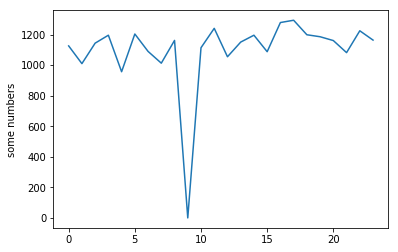

In [23]:
plt.plot(x, y)
plt.ylabel('some numbers')
plt.show()

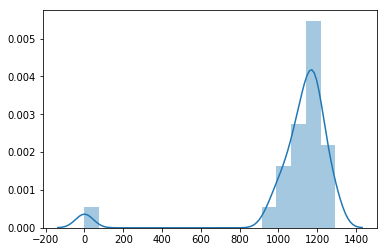

In [24]:
sns.distplot(y)

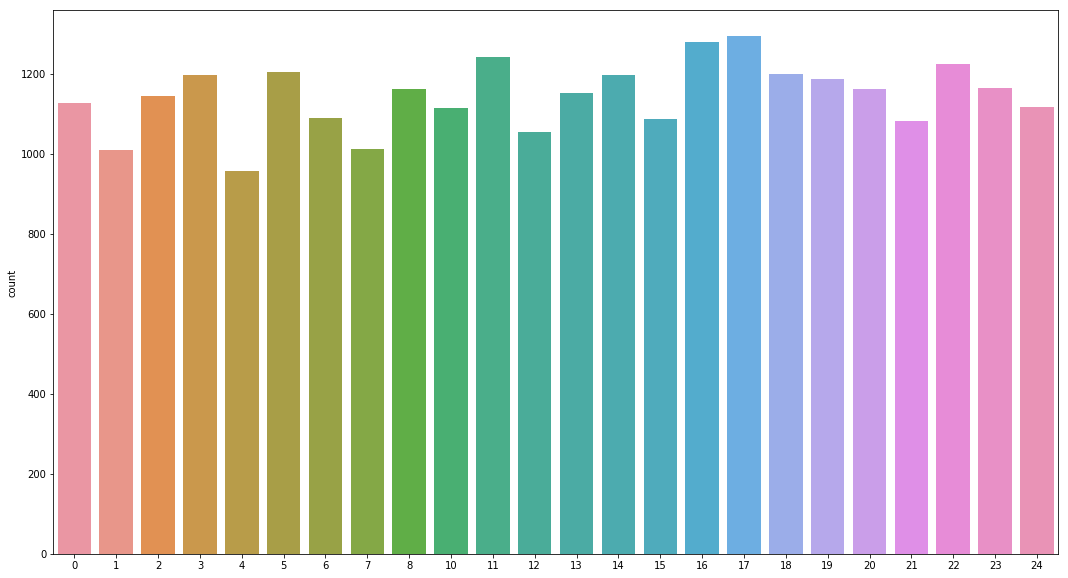

In [25]:
plt.figure(figsize=(18,10))
sns.countplot(x=train_label_data)

In [26]:
train_data.drop("label", axis=1, inplace=True)
validation_data.drop("label", axis=1, inplace=True)

In [27]:
train_image_data = train_data.values
train_image_data

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [28]:
test_image_data = validation_data.values
test_image_data

array([[149, 149, 150, ..., 112, 120, 107],
       [126, 128, 131, ..., 184, 182, 180],
       [ 85,  88,  92, ..., 225, 224, 222],
       ...,
       [190, 191, 190, ..., 211, 209, 208],
       [201, 205, 208, ...,  67,  70,  63],
       [173, 174, 173, ..., 195, 193, 192]])

In [29]:
print(train_image_data[0])

[107 118 127 134 139 143 146 150 153 156 158 160 163 165 159 166 168 170
 170 171 171 171 172 171 171 170 170 169 111 121 129 135 141 144 148 151
 154 157 160 163 164 170 119 152 171 171 170 171 172 172 172 172 172 171
 171 170 113 123 131 137 142 145 150 152 155 158 161 163 164 172 105 142
 170 171 171 171 172 172 173 173 172 171 171 171 116 125 133 139 143 146
 151 153 156 159 162 163 167 167  95 144 171 172 172 172 172 172 173 173
 173 172 172 171 117 126 134 140 145 149 153 156 158 161 163 164 175 156
  87 154 172 173 173 173 173 173 174 174 174 173 172 172 119 128 136 142
 146 150 153 156 159 163 165 164 184 148  89 164 172 174 174 174 174 175
 175 174 175 174 173 173 122 130 138 143 147 150 154 158 162 165 166 172
 181 128  94 170 173 175 174 175 176 177 177 177 177 175 175 174 122 132
 139 145 149 152 156 160 163 165 166 181 172 103 113 175 176 178 178 179
 179 179 179 178 179 177 175 174 125 134 141 147 150 153 157 161 164 167
 168 184 179 116 126 165 176 179 180 180 181 180 18

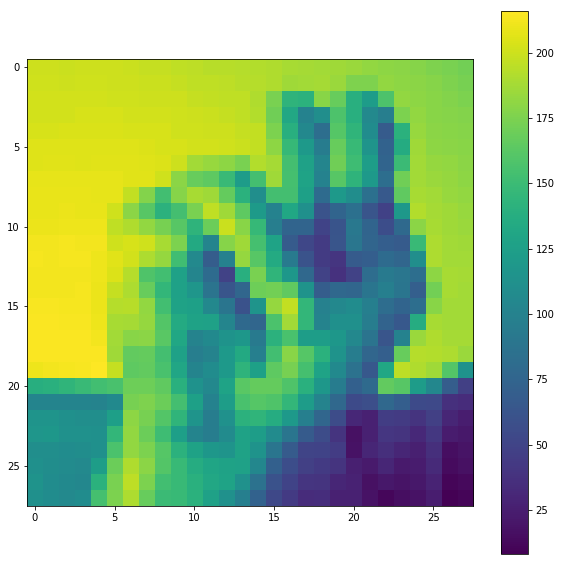

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(train_image_data[999].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

In [31]:
len(train_image_data)

27455

In [32]:
train_image_object = []
for entry in train_image_data:
    train_image_object.append(entry.reshape(28,28))

In [33]:
test_image_object = []
for entry in test_image_data:
    test_image_object.append(entry.reshape(28,28))

In [34]:
a = int(len(train_image_object)/2)
print(int(a))

13727


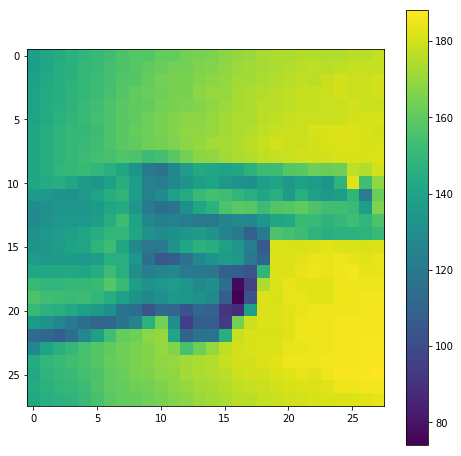

In [35]:
plt.figure(figsize=(8,8))
plt.imshow(train_image_object[13727])
plt.colorbar()
plt.grid(False)
plt.show()

In [36]:
train_images = np.array([train_image_data[i].reshape(28,28) for i in range(train_image_data.shape[0])])
test_images = np.array([test_image_data[i].reshape(28,28) for i in range(test_image_data.shape[0])])

In [37]:
data = np.concatenate((train_images,test_images), axis=0)
data.shape

(34627, 28, 28)

In [38]:
labels = np.concatenate((train_label_data, test_label_data), axis=0)
labels.shape

(34627,)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.30, random_state = 101)
# x is of object type and y is of label type

In [40]:
x_train.shape

(24238, 28, 28)

In [41]:
x_test.shape

(10389, 28, 28)

In [42]:
y_train.shape

(24238,)

In [43]:
y_test.shape

(10389,)

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Using TensorFlow backend.


In [45]:
batch_size = 128
num_classes = 24
epochs = 50

In [46]:
# Note that our pixel data is not normalized.
print(x_train)

[[[146 152 157 ... 188 185 185]
  [147 153 157 ... 188 187 187]
  [148 155 157 ... 189 189 189]
  ...
  [139 141 142 ... 134 135 131]
  [135 136 136 ... 125 121 127]
  [140 140 142 ... 127 156 223]]

 [[211 213 216 ... 202 202 199]
  [214 216 217 ... 204 203 201]
  [216 218 219 ... 206 205 203]
  ...
  [235 238 243 ... 235 232 230]
  [236 240 243 ... 235 233 231]
  [238 240 243 ... 236 235 233]]

 [[217 219 220 ... 225 223 222]
  [218 220 221 ... 226 225 224]
  [219 221 222 ... 227 226 226]
  ...
  [242 251 221 ... 248 252 251]
  [243 249 229 ... 250 251 251]
  [243 249 235 ... 252 252 252]]

 ...

 [[140 142 144 ... 166 166 166]
  [142 143 145 ... 167 167 167]
  [143 143 146 ... 169 168 168]
  ...
  [153 158 162 ... 193 193 193]
  [153 157 162 ... 194 193 193]
  [152 156 161 ... 193 193 193]]

 [[ 84  91  98 ... 142 142 141]
  [ 88  95 100 ... 145 145 144]
  [ 91  97 103 ... 148 147 148]
  ...
  [135 140 145 ... 190 191 194]
  [134 139 144 ... 196 196 189]
  [133 139 144 ... 187 145 1

In [47]:
# Normalize by dividing by maximum possible value
x_train = x_train/255
x_test = x_test/255

In [48]:
x_train.shape

(24238, 28, 28)

In [66]:
x_test.shape

(10389, 28, 28, 1)

In [67]:
y_train.shape

(24238,)

In [68]:
y_test.shape

(10389,)

In [50]:
# Plotting not possible in this state because array is now 3 dimensional
x_train[69]

array([[0.61568627, 0.61960784, 0.61960784, 0.61960784, 0.61960784,
        0.62352941, 0.62352941, 0.61960784, 0.61568627, 0.61176471,
        0.61176471, 0.61176471, 0.60784314, 0.60392157, 0.6       ,
        0.59607843, 0.6       , 0.59607843, 0.59215686, 0.59215686,
        0.59215686, 0.58823529, 0.58039216, 0.57647059, 0.57254902,
        0.57254902, 0.56470588, 0.56078431],
       [0.62352941, 0.62352941, 0.62352941, 0.62745098, 0.62745098,
        0.62745098, 0.62745098, 0.62745098, 0.62352941, 0.61960784,
        0.61960784, 0.61568627, 0.61176471, 0.61176471, 0.60784314,
        0.60392157, 0.60392157, 0.60392157, 0.59607843, 0.59607843,
        0.6       , 0.59215686, 0.58823529, 0.58431373, 0.58039216,
        0.58039216, 0.57647059, 0.57254902],
       [0.63137255, 0.63529412, 0.63529412, 0.63529412, 0.63529412,
        0.63529412, 0.63137255, 0.63529412, 0.63529412, 0.62745098,
        0.62745098, 0.62745098, 0.62352941, 0.62352941, 0.62352941,
        0.63137255, 0.6196

In [51]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [52]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [53]:
x_train.shape

(24238, 28, 28, 1)

In [59]:
x_test.shape

(10389, 28, 28, 1)

In [64]:
sample = x_train[0].flatten().reshape(28,28)

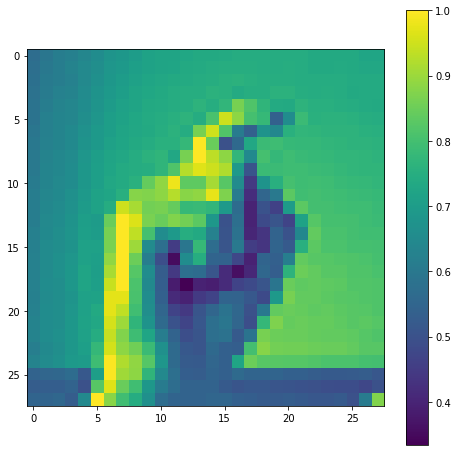

In [65]:
plt.figure(figsize=(8,8))
plt.imshow(sample)
plt.colorbar()
plt.grid(False)
plt.show()

In [82]:
# Transform y labels to proper encoding
labels_train = []
labels_test = []

for entry in y_train:
    zeros = np.zeros(25)
    zeros[entry] = 1
    labels_train.append(zeros)
for entry in y_test:
    zeros = np.zeros(25)
    zeros[entry] = 1
    labels_test.append(zeros)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [85]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels_train_binarized = label_binrizer.fit_transform(y_train)
labels_test_binarized = label_binrizer.fit_transform(y_test)

In [55]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [56]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [57]:
epochs = 15

In [86]:
history = model.fit(x_train, labels_train_binarized, validation_data = (x_test, labels_test_binarized), epochs=epochs, batch_size=batch_size)

Instructions for updating:
Use tf.cast instead.
Train on 24238 samples, validate on 10389 samples
Epoch 1/15
24238/24238 [==============================] - 28s 1ms/step - loss: 2.3326 - acc: 0.2820 - val_loss: 1.1349 - val_acc: 0.6644
Epoch 2/15
24238/24238 [==============================] - 27s 1ms/step - loss: 0.9272 - acc: 0.6871 - val_loss: 0.6208 - val_acc: 0.7922
Epoch 3/15
24238/24238 [==============================] - 26s 1ms/step - loss: 0.5163 - acc: 0.8260 - val_loss: 0.2891 - val_acc: 0.9207
Epoch 4/15
24238/24238 [==============================] - 26s 1ms/step - loss: 0.3198 - acc: 0.8932 - val_loss: 0.1847 - val_acc: 0.9437
Epoch 5/15
24238/24238 [==============================] - 26s 1ms/step - loss: 0.2041 - acc: 0.9346 - val_loss: 0.1138 - val_acc: 0.9685
Epoch 6/15
24238/24238 [==============================] - 26s 1ms/step - loss: 0.1268 - acc: 0.9609 - val_loss: 0.0628 - val_acc: 0.9869
Epoch 7/15
24238/24238 [==============================] - 26s 1ms/step - loss: 0

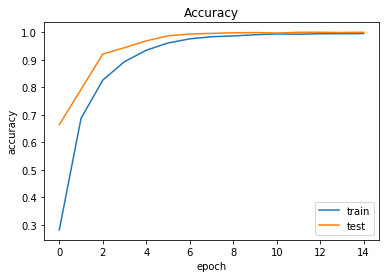

In [87]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [97]:
test_images = validation_data.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [109]:
test_labels = label_binrizer.fit_transform(test_label_data)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape

(7172, 28, 28, 1)

In [110]:
y_pred = model.predict(test_images)
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.9877300613496932